# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.cluster import KMeans

# Data Collection & Analysis

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#number of rows and columns
df.shape

(200, 5)

In [4]:
#some more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#statistical measures
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#checking missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Choosing the Annual Income Column & Spending score column

In [7]:
x=df.iloc[:,[3,4]].values

In [8]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Choosing the number of clusters

WCSS ---> Within Clusters Sum Of Squares

In [30]:
#finding wcss values for different number of Clusters

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=300,random_state=42,n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print("The wcss values for different number of Clusters:")
wcss


The wcss values for different number of Clusters:


[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25011.839349156595,
 21862.09267218289,
 19672.07284901432]

# PLOTTING A ELBOW GRAPH

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

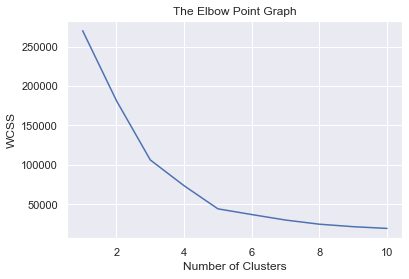

In [10]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

Optimal number of Clusters=5

As there is no significant drop after value 5

# Training the K-Means Clustering model

In [11]:
kmeans=KMeans(n_clusters=5, init='k-means++',max_iter=300,random_state=0)
#return the label for each datapoint based on their cluster

y=kmeans.fit_predict(x)

y

C:\Users\kakul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

# Visualizing all the clusters

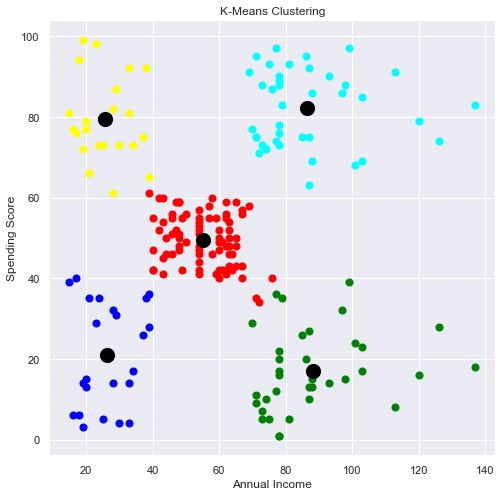

In [12]:
#plotting all the clusters and their centroid

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster 0')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='Cluster 1')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='cyan',label='Cluster 2')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='blue',label='Cluster 4')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='centroids')
plt.title("K-Means Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# AFFINITY PROPAGATION

Affinity Propagation involves finding a set of exemplars that best summarize the data.

Affinity Propagation is a clustering algorithm that does not require specifying the number of 
clusters beforehand.

It determines the number of clusters based on the data and the underlying similarity matrix.


Number of clusters found :
11


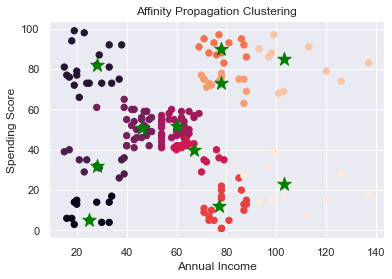

In [13]:
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt

# Create an instance of AffinityPropagation
affinity_propagation = AffinityPropagation()

# Fit the data to the algorithm
affinity_propagation.fit(x)

# Get the cluster labels
cluster_labels = affinity_propagation.labels_


# Get the cluster centers
cluster_centers = affinity_propagation.cluster_centers_

print("Number of clusters found :")
print(len(cluster_centers))

# Visualize the clusters and centroids
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels,s=40)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=200, c='green')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Affinity Propagation Clustering")
plt.show()



# BIRCH

BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is a hierarchical clustering algorithm designed for large-scale datasets.

It aims to efficiently cluster large datasets by incrementally building a tree-like data structure called the Cluster Feature Tree (CFT). 

The CFT summarizes the dataset's distribution and allows for efficient clustering.

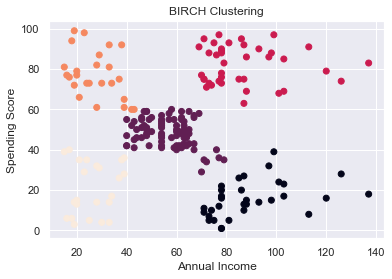

In [14]:
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

# Create an instance of the BIRCH clustering algorithm
birch = Birch(n_clusters=5)

# Fit the data to the algorithm
birch.fit(x)

# Get the cluster labels
cluster_labels = birch.labels_

# Get the cluster centers
cluster_centers = birch.subcluster_centers_


# Visualize the clusters and centroids
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
#plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=100, c='black')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("BIRCH Clustering")
plt.show()


In [15]:
from sklearn import metrics
score_br = metrics.silhouette_score(x,cluster_labels)

print("Score of Birch = ", score_br)

Score of Birch =  0.5419687641328385


# DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm commonly used for discovering clusters of arbitrary shape in spatial data. 

It groups together data points that are close to each other in the feature space and separates regions of lower density.

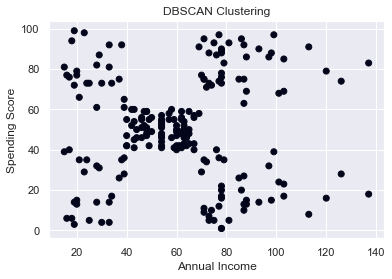

In [16]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Create an instance of the DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.3, min_samples=25)

# Fit the data to the algorithm
dbscan.fit(x)

# Get the cluster labels
cluster_labels = dbscan.labels_

# Visualize the clusters
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("DBSCAN Clustering")
plt.show()


# Mini-Batch K-Means

Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

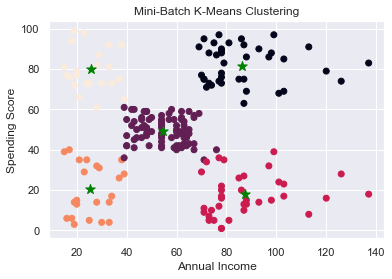

In [31]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# Create an instance of MiniBatchKMeans
mini_batch_kmeans = MiniBatchKMeans(n_clusters=5,batch_size=2048,n_init=10)

# Fit the data to the algorithm
mini_batch_kmeans.fit(x)

# Get the cluster labels
cluster_labels = mini_batch_kmeans.labels_

# Get the cluster centers
cluster_centers = mini_batch_kmeans.cluster_centers_

# Visualize the clusters and centroids
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=100, c='green')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Mini-Batch K-Means Clustering")
plt.show()


# Mean Shift

Mean Shift is a non-parametric clustering algorithm that aims to discover clusters in a dataset by iteratively shifting data points towards the mode (peak) of the data distribution. It does not require specifying the number of clusters in advance and can handle irregularly shaped clusters.

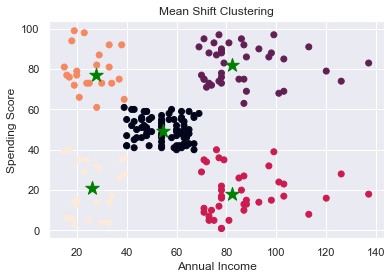

In [18]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

# Create an instance of MeanShift
mean_shift = MeanShift(bandwidth=25)

# Fit the data to the algorithm
mean_shift.fit(x)

# Get the cluster labels
cluster_labels = mean_shift.labels_

# Get the cluster centers
cluster_centers = mean_shift.cluster_centers_

# Visualize the clusters and centroids
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=200, c='green')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Mean Shift Clustering")
plt.show()


In [19]:
from sklearn import metrics
score_ms = metrics.silhouette_score(x,cluster_labels)

print("Score of Mean Shift = ", score_ms)

Score of Mean Shift =  0.5513250428036421


# OPTICS 

OPTICS (Ordering Points To Identify the Clustering Structure) is a density-based clustering algorithm that extends the DBSCAN algorithm. It aims to overcome one of the limitations of DBSCAN, which is the difficulty in determining the appropriate values for the epsilon (eps) and minimum points (min_samples) parameters.

Instead of using a fixed epsilon value, OPTICS creates a reachability plot that characterizes the density-based clustering structure of the data. It identifies core samples, which are dense regions, and connects them to form clusters. OPTICS provides a more flexible and adaptive approach to clustering

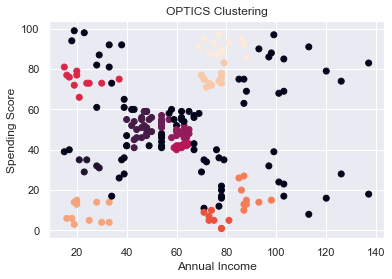

In [20]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Create an instance of OPTICS
optics = OPTICS()

# Fit the data to the algorithm
optics.fit(x)

# Get the cluster labels
cluster_labels = optics.labels_

# Visualize the clusters
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("OPTICS Clustering")
plt.show()


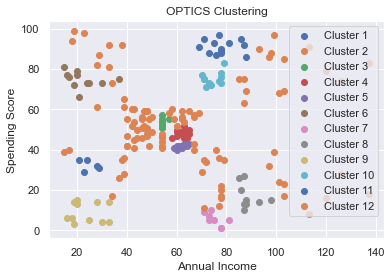

In [21]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Create an instance of OPTICS
optics = OPTICS()

# Fit the data to the algorithm
optics.fit(x)

# Get the cluster labels
cluster_labels = optics.labels_

# Define meaningful labels for the clusters
num_clusters = len(set(cluster_labels))
cluster_names = [f"Cluster {i+1}" for i in range(num_clusters)]

# Visualize the clusters with labels
for cluster_label in set(cluster_labels):
    cluster_points = x[cluster_labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=cluster_names[cluster_label])

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("OPTICS Clustering")
plt.legend()
plt.show()


In [22]:
from sklearn import metrics
score_optics = metrics.silhouette_score(x,cluster_labels)

print("Score of Optics = ", score_optics)

Score of Optics =  0.035688157101128805


# Spectral Clustering

Spectral Clustering is a clustering algorithm that utilizes the spectral properties of the data to group similar data points together. It operates by transforming the data into a lower-dimensional space and performing clustering in that space

C:\Users\kakul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  est = KMeans(


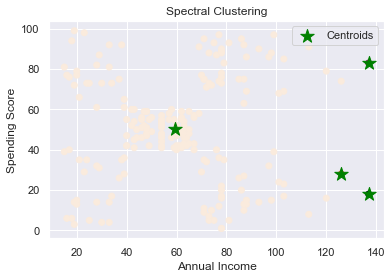

In [23]:
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

# Create an instance of SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=5)

# Fit the data to the algorithm
spectral_clustering.fit(x)

# Get the cluster labels
cluster_labels = spectral_clustering.labels_

# Calculate the centroids
cluster_centers = []
for label in np.unique(cluster_labels):
    cluster_centers.append(np.mean(x[cluster_labels == label], axis=0))

# Convert centroids to numpy array
cluster_centers = np.array(cluster_centers)

# Visualize the clusters and centroids
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=200, c='green', label='Centroids')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Spectral Clustering")
plt.legend()
plt.show()


In [24]:
from sklearn import metrics
score_spectral = metrics.silhouette_score(x,cluster_labels)

print("Score of Spectral Clustering = ", score_spectral)

Score of Spectral Clustering =  0.3141115836672826


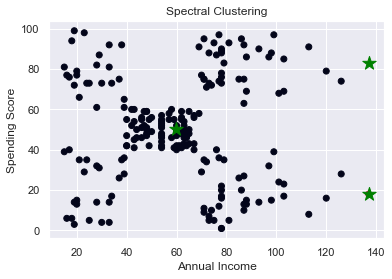

In [25]:
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

# Create an instance of SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=3)

# Fit the data to the algorithm
spectral_clustering.fit(x)

# Get the cluster labels
cluster_labels = spectral_clustering.labels_

# Calculate the centroids
cluster_centers = []
for label in np.unique(cluster_labels):
    cluster_centers.append(np.mean(x[cluster_labels == label], axis=0))

# Convert centroids to numpy array
cluster_centers = np.array(cluster_centers)

# Visualize the clusters and centroids
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=200, c='green')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Spectral Clustering")
plt.show()


# Gaussian Mixture Model

Gaussian Mixture Model (GMM) is a probabilistic model that represents a dataset as a mixture of Gaussian distributions. It is commonly used for clustering and density estimation tasks.

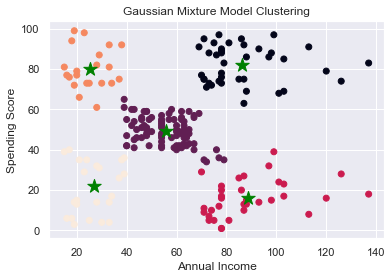

In [32]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Create an instance of GaussianMixture with the desired number of clusters
gmm = GaussianMixture(n_components=5)

# Fit the data to the model
gmm.fit(x)

# Get the cluster labels
cluster_labels = gmm.predict(x)

# Get the cluster means (centroids)
cluster_centers = gmm.means_

# Visualize the clusters and centroids
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=200, c='green')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Gaussian Mixture Model Clustering")

plt.show()


In [27]:
from sklearn import metrics
score_gaussian = metrics.silhouette_score(x,cluster_labels)

print("Score of Guassian Mixture Model Clustering = ", score_gaussian)

Score of Guassian Mixture Model Clustering =  0.5528243704895652


# Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering algorithm that builds a hierarchy of clusters by successively merging individual data points or clusters based on a distance metric

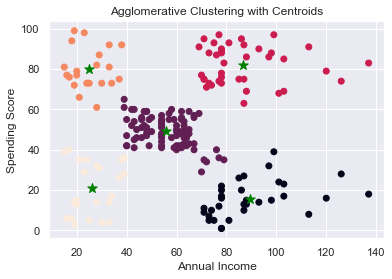

In [28]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

# Create an instance of AgglomerativeClustering with the desired number of clusters
agglomerative_clustering = AgglomerativeClustering(n_clusters=5)

# Fit the data to the algorithm
cluster_labels = agglomerative_clustering.fit_predict(x)

# Calculate the centroids
cluster_centers = []
for label in np.unique(cluster_labels):
    cluster_centers.append(np.mean(x[cluster_labels == label], axis=0))

# Convert centroids to numpy array
cluster_centers = np.array(cluster_centers)

# Visualize the clusters and centroids
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=100, c='green')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Agglomerative Clustering with Centroids")
plt.show()


In [29]:
from sklearn import metrics
score_agglomerative = metrics.silhouette_score(x,cluster_labels)

print("Score of Agglomerative Clustering = ", score_agglomerative)

Score of Agglomerative Clustering =  0.5529945955148897
